In [1]:
import numpy as np
import value_option_tree as vopt
import matplotlib.pyplot as plt
import bird_on_a_wire as bow

In [2]:
# eval_option_tree
# This function evaluates the value of a European call option using a binomial tree model.
# It calculates the option value at maturity and then works backwards to find the present value.
# Parameters:
# S: Current stock price
# E: Strike price of the option
# r: Risk-free interest rate
# sigma: Volatility of the stock
# dt: Time step in years
# N_steps: Number of steps in the binomial tree
print(vopt.eval_option_tree(100, 100, 0.1, 0.2, 1/12, 5))

[[34.07524379]
 [19.2440234 ]
 [ 6.05341236]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
[[27.2732864 ]
 [13.28590961]
 [ 3.34208396]
 [ 0.        ]
 [ 0.        ]]
[[20.89852787]
 [ 8.80444136]
 [ 1.84516179]
 [ 0.        ]]
[[15.40881255]
 [ 5.67212502]
 [ 1.0187123 ]]
[[11.00086509]
 [ 3.57943851]]
7.647219854859947


In [9]:
res_odd = []
res_even = []
for i in range(1,200,2):
    res_odd.append([i, vopt.eval_option_tree(100, 100, 0.1, 0.2, 4/12, i)])
    res_even.append([i+1, vopt.eval_option_tree(100, 100, 0.1, 0.2, 4/12, i+1)])
res_odd = np.array(res_odd)
res_even = np.array(res_even)

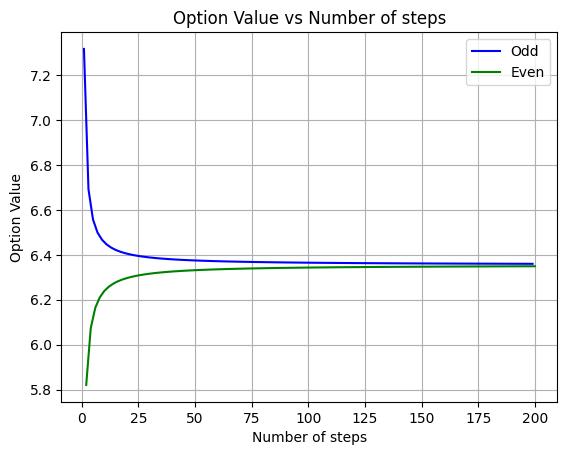

In [12]:
plt.plot(res_odd[:, 0], res_odd[:, 1],color='blue', label="Odd")
plt.plot(res_even[:, 0], res_even[:, 1],color='green', label="Even")
plt.xlabel("Number of steps")
plt.ylabel("Option Value")
plt.title("Option Value vs Number of steps")
plt.grid(True)
plt.legend()
plt.show()

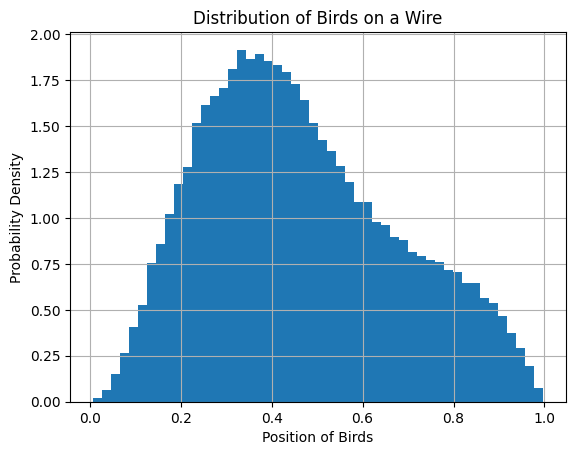

In [17]:
cur_res = []
for i in range(100000):   
        cur_res.append(bow.bird_on_a_wire(5))
cur_res = np.array(cur_res)
plt.hist(cur_res, bins=50, density=True)
plt.xlabel("Position of Birds")
plt.ylabel("Probability Density")
plt.title("Distribution of Birds on a Wire")
plt.grid(True)
plt.show()

In [18]:
np.mean(cur_res)

np.float64(0.46287910899487833)

In [26]:
res = []
for N in range(5,60):
    print(f"N = {N}", end='\r')
    cur_res = []
    for i in range(30000):   
        cur_res.append(bow.bird_on_a_wire(N))
    cur_res = np.array(cur_res)
    res.append([N, np.mean(cur_res)])
res = np.array(res)




/tmp/ipykernel_22640/1970282961.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


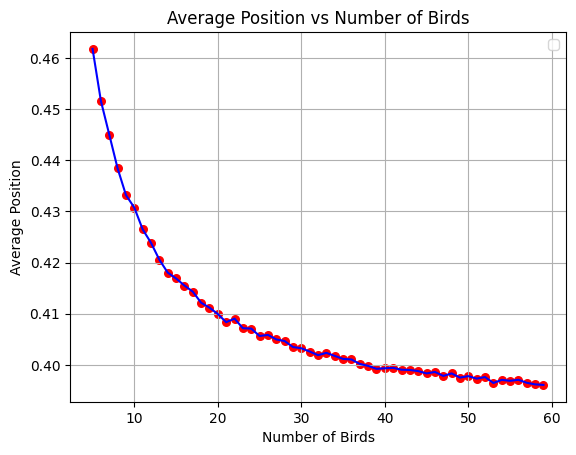

In [27]:
plt.plot(res[:, 0], res[:, 1], color='blue')
plt.scatter(res[:, 0], res[:, 1], color='red', s=30)
plt.xlabel("Number of Birds")
plt.ylabel("Average Position")
plt.title("Average Position vs Number of Birds")
plt.grid(True)
plt.legend()
plt.show()